In [1]:
import cv2
from PIL import Image
import imutils
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import signal
import scipy.stats as stats

## Fourier transform of an image

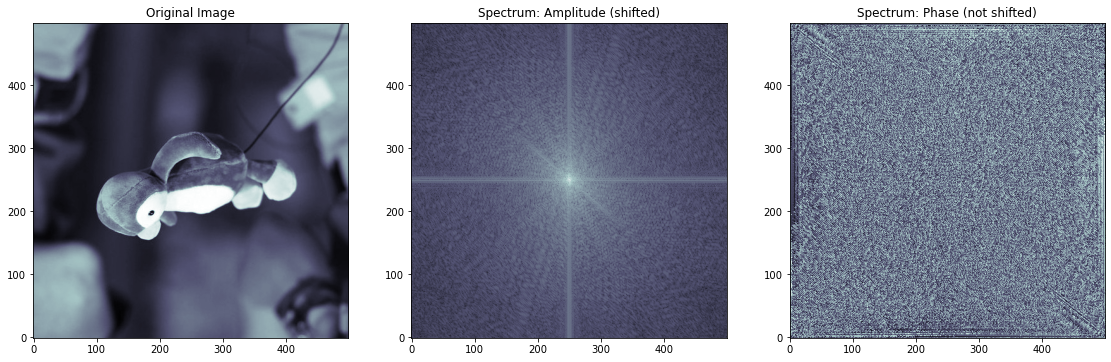

In [77]:
plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

#Open image and FT:
image = cv2.imread("./Penguin_fly_sq_bw.jpg", 0)
ft_image = np.fft.fft2(image)
ftshift_image = np.fft.fftshift(ft_image)

plt.subplot(131), plt.imshow(image, 'bone', origin='lower'), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.log(1+np.abs(ftshift_image)), 'bone', origin='lower'), plt.title("Spectrum: Amplitude (shifted)")
plt.subplot(133), plt.imshow(np.angle(ft_image), 'bone', origin='lower'), plt.title("Spectrum: Phase (not shifted)")
plt.show()

### Phase and amplitude information

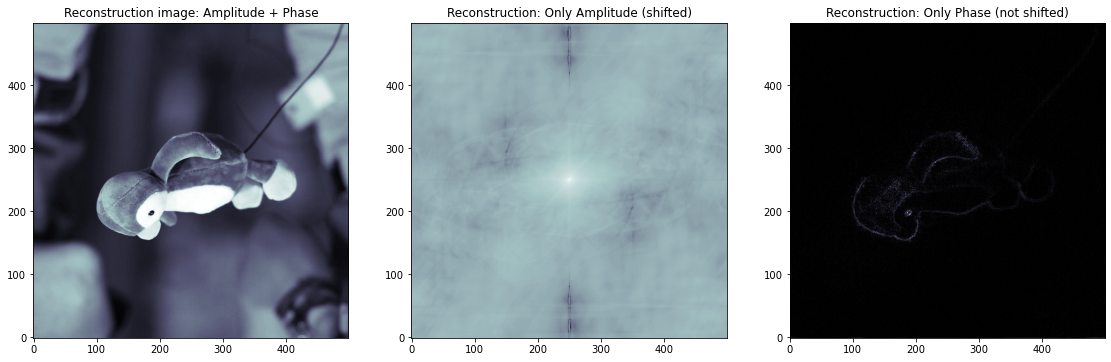

In [78]:
plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

# Two equivalent ways of reconstructing image
rec1_img = np.fft.ifft2(np.real(ft_image)+np.complex(0,1)*np.imag(ft_image))
rec2_img = np.fft.ifft2(np.abs(ft_image)*np.exp(np.complex(0,1)*np.angle(ft_image)))

rec_ampli = np.fft.ifftshift (np.fft.ifft2((np.abs(ft_image))))
rec_phase = np.fft.ifft2(np.fft.ifftshift (np.exp(np.complex(0,1)*np.angle(ft_image))))

plt.subplot(131), plt.imshow(np.abs(rec2_img), 'bone', origin='lower'), plt.title("Reconstruction image: Amplitude + Phase")
plt.subplot(132), plt.imshow(np.power(np.abs(rec_ampli),0.01), 'bone', origin='lower'), plt.title("Reconstruction: Only Amplitude (shifted)")
plt.subplot(133), plt.imshow(np.abs(rec_phase), 'bone', origin='lower'), plt.title("Reconstruction: Only Phase (not shifted)")
plt.show()


Difference between original and Fourier reconstruction

1.1368683772161603e-13
-1.1368683772161603e-13


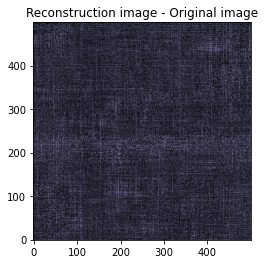

In [86]:
diff_ft_ori = rec2_img-image
plt.imshow(np.abs(diff_ft_ori), 'bone', origin='lower'), plt.title("Reconstruction image - Original image")
print(np.real(np.max(diff_ft_ori)))
print(np.real(np.min(diff_ft_ori)))
plt.show()

### Mixing two images

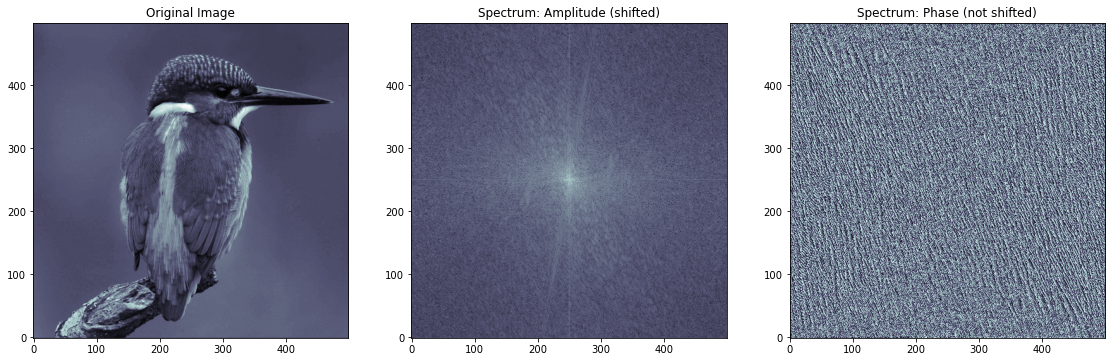

In [20]:
plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

image2_derot = cv2.imread("./Martin_square.jpg", 0)
image2_rot = imutils.rotate(image2_derot, angle=180)
image2 = cv2.resize(image2_rot, np.shape(image), interpolation = cv2.INTER_AREA)
ft_image2 = np.fft.fft2(image2)
ftshift_image2 = np.fft.fftshift(ft_image2)

plt.subplot(131), plt.imshow(image2, 'bone', origin='lower'), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.log(1+np.abs(ftshift_image2)), 'bone', origin='lower'), plt.title("Spectrum: Amplitude (shifted)")
plt.subplot(133), plt.imshow(np.angle(ft_image2), 'bone', origin='lower'), plt.title("Spectrum: Phase (not shifted)")
plt.show()


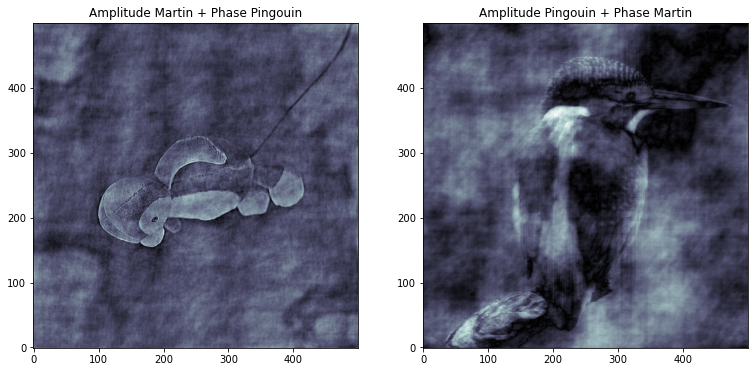

500

In [36]:
plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)

rec12_img = np.fft.ifft2(np.abs(ft_image)*np.exp(np.complex(0,1)*np.angle(ft_image2)))
rec21_img = np.fft.ifft2(np.abs(ft_image2)*np.exp(np.complex(0,1)*np.angle(ft_image)))

plt.subplot(122), plt.imshow(np.abs(rec12_img), 'bone', origin='lower'), plt.title("Amplitude Pingouin + Phase Martin")
plt.subplot(121), plt.imshow(np.abs(rec21_img), 'bone', origin='lower'), plt.title("Amplitude Martin + Phase Pingouin")

plt.show()

### Filtering images

(<AxesSubplot:title={'center':'HPF+LPF image'}>,
 Text(0.5, 1.0, 'HPF+LPF image'))

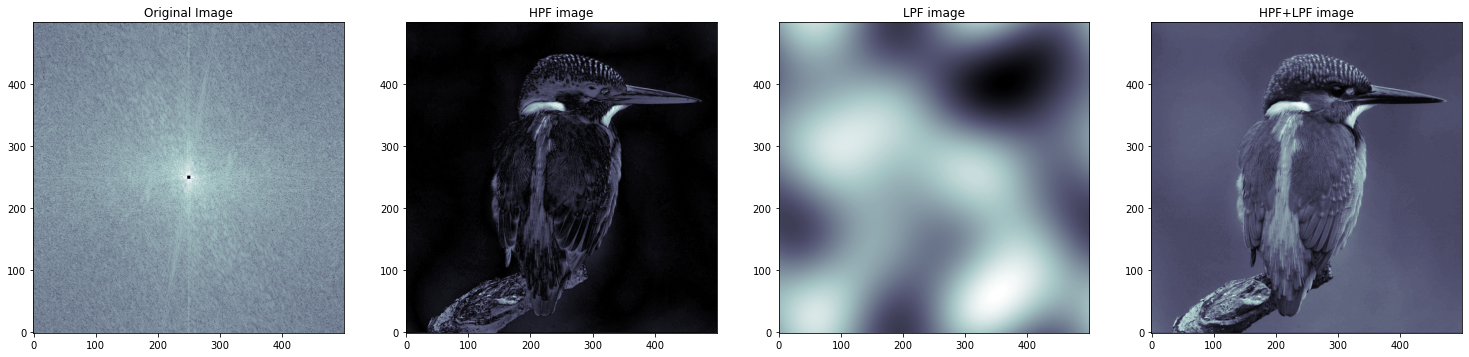

In [74]:
plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

mask_radius = 3
newy, newx = np.mgrid[:np.shape(image2)[0],:np.shape(image2)[0]]-np.shape(image2)[0]/2.
mask = (newx)**2 + (newy)**2 < mask_radius**2

filtered_tf2 = ftshift_image2 * (1-mask)
plt.subplot(141), plt.imshow(np.log(1+np.abs(filtered_tf2)), 'bone', origin='lower'), plt.title("Original Image")

rec_hpf = np.fft.ifft2(np.abs(np.fft.ifftshift(filtered_tf2))*np.exp(np.complex(0,1)*np.angle(ft_image2)))
plt.subplot(142), plt.imshow(np.abs(rec_hpf), 'bone', origin='lower'), plt.title("HPF image")


rec_lpf = np.fft.ifft2(np.abs(np.fft.ifftshift(ftshift_image2 * (mask)))*np.exp(np.complex(0,1)*np.angle(ft_image2)))
plt.subplot(143), plt.imshow(np.abs(rec_lpf), 'bone', origin='lower'), plt.title("LPF image")

plt.subplot(144), plt.imshow(np.abs(rec_lpf+rec_hpf), 'bone', origin='lower'), plt.title("HPF+LPF image")



And looking at the residuals:

8.526512829121202e-14
-7.105427357601002e-14


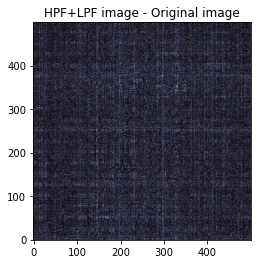

In [87]:
diff_filt_ori = rec_lpf+rec_hpf-image2
plt.imshow(np.abs(diff_filt_ori), 'bone', origin='lower'), plt.title("HPF+LPF image - Original image")
print(np.real(np.max(diff_filt_ori)))
print(np.real(np.min(diff_filt_ori)))
plt.show()